# Trabajo Final Analisis Predictivo_Javier Gilabert Sabater

-----

# IMPORTANTE: CAMBIAR NOMBRES TRAIN Y TEST PARA RESERVAS Y CANCELACIONES

# Prophet

## Analisis Serie Reservas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
# Para prohet, dejamos el dataframe sin indice y con dos columnas ds para fecha e y para valores.

df_w_r = pd.read_csv('df_reservas.csv')
df_w_r.columns = ['ds', 'y']
df_w_r.tail()

,ds,y
109,2017-08-06,452
110,2017-08-13,442
111,2017-08-20,465
112,2017-08-27,472
113,2017-09-03,248


<Axes: >

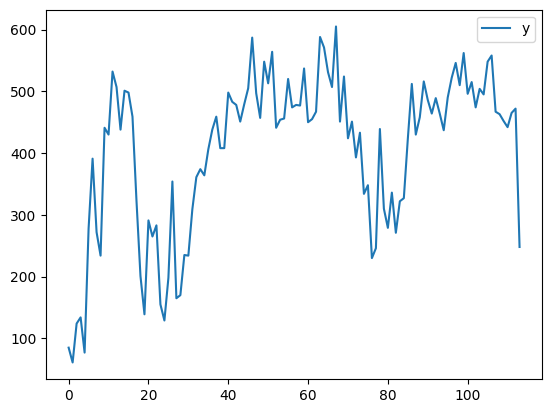

In [4]:
import matplotlib.pyplot as plt
df_w_r.plot()

In [5]:
train = df_w_r.iloc[:110,:]
test = df_w_r.iloc[110:,:]

In [6]:
test

,ds,y
110,2017-08-13,442
111,2017-08-20,465
112,2017-08-27,472
113,2017-09-03,248


In [7]:
prophet_m = Prophet()
prophet_m.fit(train)

18:52:36 - cmdstanpy - INFO - Chain [1] start processing
18:52:36 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
future = prophet_m.make_future_dataframe(periods=len(test))
forecast = prophet_m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-05,254.248225,193.711652,346.148137,254.248225,254.248225,8.588290,8.588290,8.588290,8.588290,8.588290,8.588290,0.0,0.0,0.0,262.836515
1,2015-07-12,257.935306,153.165055,306.268929,257.935306,257.935306,-30.493919,-30.493919,-30.493919,-30.493919,-30.493919,-30.493919,0.0,0.0,0.0,227.441387
2,2015-07-19,261.622387,123.024824,279.282107,261.622387,261.622387,-59.122026,-59.122026,-59.122026,-59.122026,-59.122026,-59.122026,0.0,0.0,0.0,202.500361
3,2015-07-26,265.309468,134.291518,294.850187,265.309468,265.309468,-50.175289,-50.175289,-50.175289,-50.175289,-50.175289,-50.175289,0.0,0.0,0.0,215.134178
4,2015-08-02,268.996549,177.910568,338.602915,268.996549,268.996549,-10.331304,-10.331304,-10.331304,-10.331304,-10.331304,-10.331304,0.0,0.0,0.0,258.665245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2017-08-06,492.909850,433.338127,585.413954,492.909850,492.909850,14.893042,14.893042,14.893042,14.893042,14.893042,14.893042,0.0,0.0,0.0,507.802892
110,2017-08-07,493.070023,437.333932,589.586894,493.070023,493.070023,19.179971,19.179971,19.179971,19.179971,19.179971,19.179971,0.0,0.0,0.0,512.249994
111,2017-08-08,493.230196,438.571081,597.415176,493.230196,493.230196,22.825808,22.825808,22.825808,22.825808,22.825808,22.825808,0.0,0.0,0.0,516.056004
112,2017-08-09,493.390368,439.579882,597.498395,493.390368,493.390368,25.789640,25.789640,25.789640,25.789640,25.789640,25.789640,0.0,0.0,0.0,519.180009


In [9]:
from sklearn.metrics import r2_score
print(r2_score(list(test['y']), list(forecast.loc[110:,'yhat'])))

-1.4820671928355504


In [10]:
list(test['y'])

[442, 465, 472, 248]

In [11]:
list(forecast.loc[110:,'yhat'])

[512.2499935366218, 516.0560036265241, 519.1800086825887, 521.6014073528016]

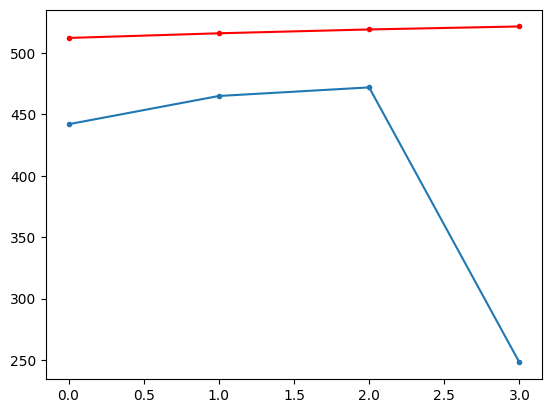

In [12]:
import matplotlib.pyplot as plt
plt.plot(list(test['y']),'.-')
plt.plot(list(forecast.loc[110:,'yhat']),'r.-')
plt.show()


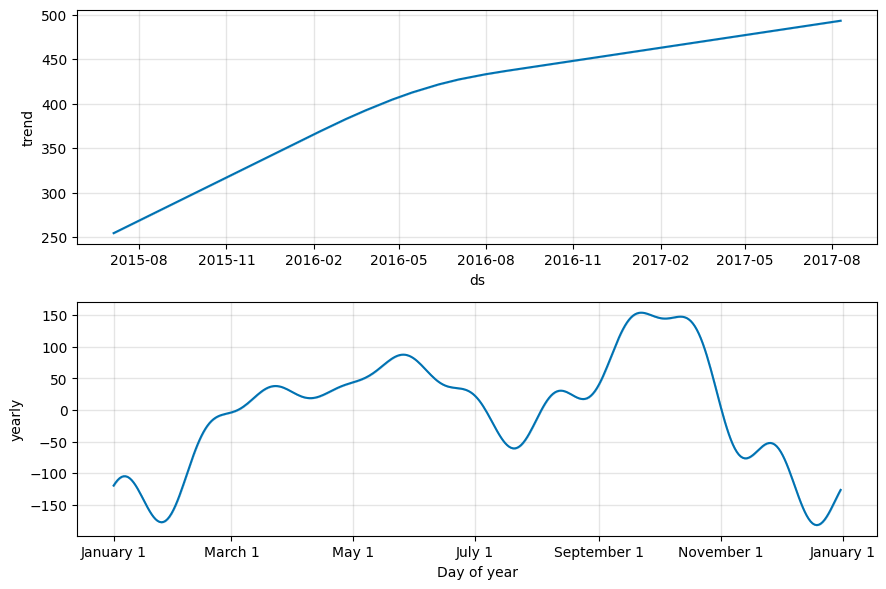

In [14]:
fig2 = prophet_m.plot_components(forecast)
plt.show()

In [15]:
m2 = Prophet()
m2.add_seasonality(name='monthly', period=30.5, fourier_order=5)

m2.fit(train)

future2 = m2.make_future_dataframe(periods=len(test))
forecast2 = m2.predict(future)
print(r2_score(list(test['y']), list(forecast2.loc[110:,'yhat'] )))

19:08:15 - cmdstanpy - INFO - Chain [1] start processing
19:08:15 - cmdstanpy - INFO - Chain [1] done processing


-1.2000713612749014


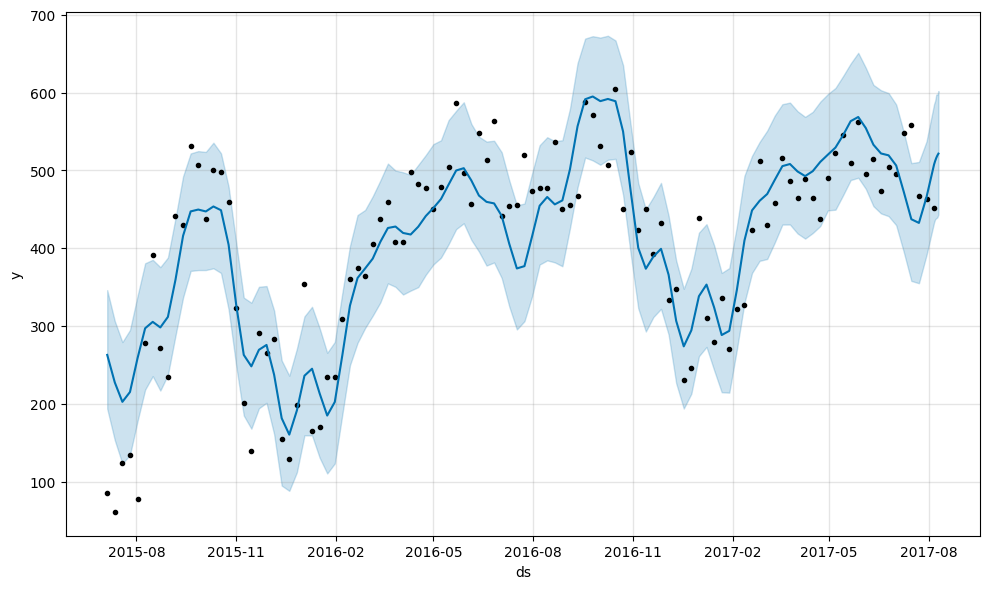

In [16]:
fig1 = m2.plot(forecast)
plt.show()

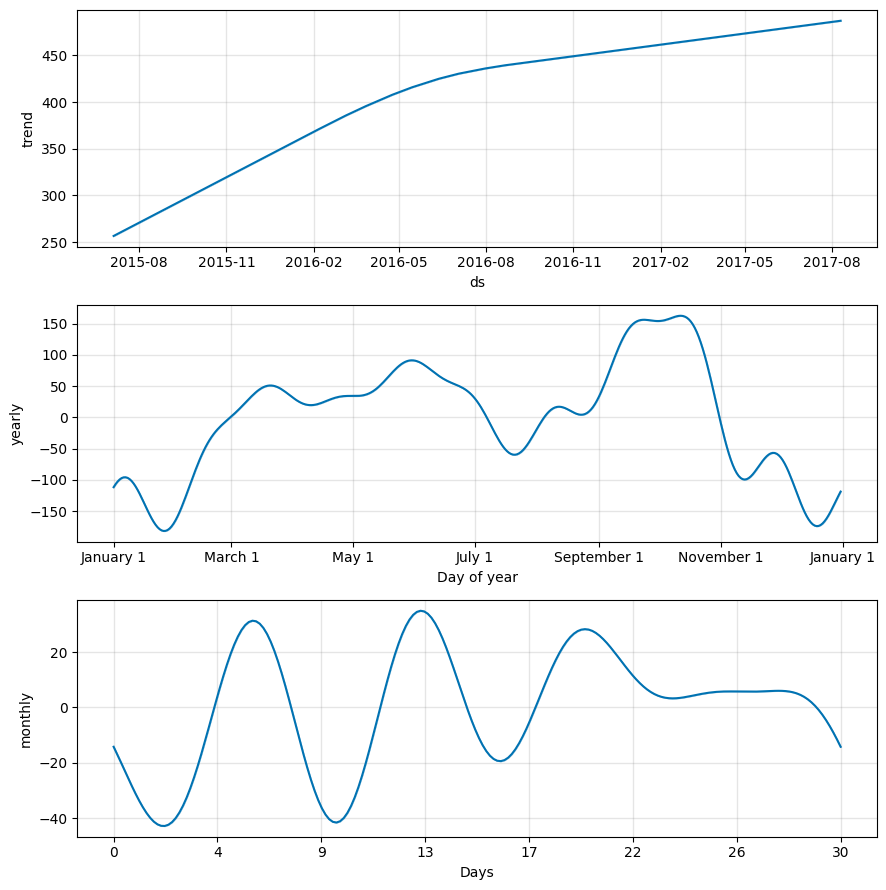

In [17]:
fig2 = m2.plot_components(forecast2)
plt.show()